# Imports:

In [1]:
from os import listdir,mkdir,makedirs
from os.path import isfile, join, isdir,exists
import pandas as pd
import numpy as np
from scipy import stats
import re
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from myplots import roundup, rounddown, find_decimal_fold, percentile_cut_off, rarefaction_calc, rarefaction_plot,draw_correlation_scatter
from matplotlib.ticker import FormatStrFormatter
import cPickle as pickle
from Bio.SeqUtils import GC
import seaborn as sns
import random
from scipy.stats import pearsonr
from skbio.diversity.alpha import shannon, simpson, berger_parker_d

from pop_organize import get_sample_data, get_sample_with_dfs
from SufficientStatistics import *
from MyFunctionsShani import *
import math
from myplots import roundup, rounddown, find_decimal_fold
from skbio.stats.distance import mantel
from scipy.spatial.distance import braycurtis, pdist
from GeneralFeaturePhenotypeInteractions.Feature_phenotype_functions import * 
from TCR_microbiome_interactions.TCR_microbiome_interactions_functions import *
from TCR_feature_generation.SubsamplingFunctions import *
from TCR_feature_generation.TCR_feature_generation_functions import *

MyPath='/net/mraid08/export/genie/Lab/Personal/ShaniBAF'

done1
stop
stop
done1
stop
done
done
done


In [2]:
import time
cdate=str(time.strftime("%d%m%Y"))
cdate

'12072018'

1. define how many seqeunces to sample from each sample
2. generate 2 subsampled datasets - a file for a subsampled sample should contain nt, aa, count (templates), frequencyCount (%)
3. on the subsampled dataset, generate public sequence matrix 
4. 

# subsampling:

for each sample, load data, subsample and add relevant columns, save to subsamples folder

In [ ]:
def subsampling(sample_df,nTemplates):
    
    #generating a popped nucleotide sequenes:
    print 'generating a popped nucleotide sequenes:...'
    inds=sample_df.index
    counts=sample_df['count (templates)']
    l = np.array([0]*int(counts.sum()))
    print 'n Unique sequences in sample is %s' %len(inds)
    print 'nTemplates in sample is %s' %sample_df['count (templates)'].sum()
    print 'l list length is %s and should be equal to nTemplates' %len(l)
    
    cumsum = list(np.cumsum(counts))
    print 'cumsum list length is %s and should be equal to n Unique' %len(cumsum)
    cumsum = np.insert(cumsum,0,0).astype(int)
    
    for jind in range(len(inds)): #loop over all numbers from zero to the length of the vector
        l[cumsum[jind]:cumsum[jind+1]] = int(inds[jind]) #replace zeros in the l vector with the relevant index
                                                     # repeat this value n times according to the number of templates per this index
    indCountdf=pd.DataFrame(l) #generate a df contains all sequences' indices and their counts
    #generate a popped nucleotide df:
    popped=pd.merge(indCountdf,pd.DataFrame(sample_df['nucleotide']),how='left',left_on=0,right_index=True)
    popped=popped.drop(0,axis=1)
    print 'length of popped nucleotide dataframe is %s and should be equal to nTemplates' %len(popped)
    
    #subsample:
    print 'subsampling...'
    subsampled=popped.sample(n=nTemplates, replace=False)
    print 'subsampled df length is %s and should be equal to %s' %(len(subsampled),nTemplates)
    
    
    subsampledGrouped=pd.DataFrame(subsampled['nucleotide'].value_counts())
    subsampledGrouped.rename(columns={'nucleotide':'count (templates)'})
    subsampledFull=pd.merge(subsampledGrouped,sample_df,how='left',left_index=True, right_on='nucleotide')
    subsampledFull=subsampledFull.rename(columns={'count (templates)':'oldTemplateCount','nucleotide_x':'count (templates)',
                                                   'frequencyCount (%)':'frequencyCount (%) old'})

    subsampledFull=subsampledFull.drop('nucleotide_y',axis=1)
    subsampledFull['frequencyCount (%)']=subsampledFull['count (templates)']*100/subsampledFull['count (templates)'].sum()
    subsampledFull.head()
    print 'templates sum in subsampled file is %s and should be equal to %s' %(subsampledFull['count (templates)'].sum(), nTemplates)
    
    return subsampledFull
    
    

## subsample 18000 templates for all samples in PNP515

In [ ]:
fullSamplesFolder='%s/TCR_real_data/SamplesForAnalysis_corrected' %MyPath
nTemplates=18000
nSampled=0
subsampledSamplesFolder='%s/TCR_real_data/SubSampled%s data' %(MyPath,nTemplates)
if not isdir(subsampledSamplesFolder):
        makedirs(subsampledSamplesFolder) 
FullFiles = [f for f in listdir(fullSamplesFolder) if isfile(join(fullSamplesFolder, f))]
FullFiles=[f.strip('.tsv') for f in FullFiles]
print 'number of samples in folder is %s' %len(FullFiles)

# #there is a mistake in the column names in the batch released on 25/2/18:
# #get right column names:
# f='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/SamplesForAnalysis/BD438.tsv'
# BD438=pd.read_table(f)
# right_column_names=BD438.columns.values
newColumnList=None


for n,f in enumerate(FullFiles):
#     if n>408:
        print n,f

        #correct column names:
        sample_df=pd.read_table('%s/%s.tsv' %(fullSamplesFolder,f))
        if newColumnList is not None: #make sure column names are correct:
            sample_df=sample_df.iloc[:,:44]
            sample_df.columns=newColumnList
        sample_df=sample_df.rename(columns={'count (templates/reads)':'count (templates)'})


        nTemplatesSample=sample_df['count (templates)'].sum()
        if nTemplatesSample>=nTemplates:
            subsampled15full=subsampling(sample_df,nTemplates)
            file1='%s/%s_%s.tsv' %(subsampledSamplesFolder,f,nTemplates)
            subsampled15full.to_csv(file1,sep='\t')
            nSampled=nSampled+1
        else:
            print 'nTemplates in sample is %s and therefore this sample is not subsampled' %nTemplatesSample

with open('%s/nSampled' %subsampledSamplesFolder,'wb') as fp:
    pickle.dump(nSampled,fp)


In [ ]:
314./515

## subsample 12500 templates for all samples in PNP515

In [ ]:
fullSamplesFolder='%s/TCR_real_data/SamplesForAnalysis_corrected' %MyPath
nTemplates=12500
nSampled=0
subsampledSamplesFolder='%s/TCR_real_data/SubSampled%s data' %(MyPath,nTemplates)
if not isdir(subsampledSamplesFolder):
        makedirs(subsampledSamplesFolder) 
FullFiles = [f for f in listdir(fullSamplesFolder) if isfile(join(fullSamplesFolder, f))]
FullFiles=[f.strip('.tsv') for f in FullFiles]
print 'number of samples in folder is %s' %len(FullFiles)

# #there is a mistake in the column names in the batch released on 25/2/18:
# #get right column names:
# f='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/SamplesForAnalysis/BD438.tsv'
# BD438=pd.read_table(f)
# right_column_names=BD438.columns.values
newColumnList=None


for n,f in enumerate(FullFiles):
#     if n>408:
        print n,f

        #correct column names:
        sample_df=pd.read_table('%s/%s.tsv' %(fullSamplesFolder,f))
        if newColumnList is not None: #make sure column names are correct:
            sample_df=sample_df.iloc[:,:44]
            sample_df.columns=newColumnList
        sample_df=sample_df.rename(columns={'count (templates/reads)':'count (templates)'})


        nTemplatesSample=sample_df['count (templates)'].sum()
        if nTemplatesSample>=nTemplates:
            subsampled15full=subsampling(sample_df,nTemplates)
            file1='%s/%s_%s.tsv' %(subsampledSamplesFolder,f,nTemplates)
            subsampled15full.to_csv(file1,sep='\t')
            nSampled=nSampled+1
        else:
            print 'nTemplates in sample is %s and therefore this sample is not subsampled' %nTemplatesSample

with open('%s/nSampled' %subsampledSamplesFolder,'wb') as fp:
    pickle.dump(nSampled,fp)


## subsample 9000 templates for all samples in PNP515

In [ ]:
fullSamplesFolder='%s/TCR_real_data/SamplesForAnalysis_corrected' %MyPath
nTemplates=9000
nSampled=0
subsampledSamplesFolder='%s/TCR_real_data/SubSampled%s data' %(MyPath,nTemplates)
if not isdir(subsampledSamplesFolder):
        makedirs(subsampledSamplesFolder) 
FullFiles = [f for f in listdir(fullSamplesFolder) if isfile(join(fullSamplesFolder, f))]
FullFiles=[f.strip('.tsv') for f in FullFiles]
print 'number of samples in folder is %s' %len(FullFiles)

# #there is a mistake in the column names in the batch released on 25/2/18:
# #get right column names:
# f='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/SamplesForAnalysis/BD438.tsv'
# BD438=pd.read_table(f)
# right_column_names=BD438.columns.values
newColumnList=None


for n,f in enumerate(FullFiles):
#     if n>408:
        print n,f

        #correct column names:
        sample_df=pd.read_table('%s/%s.tsv' %(fullSamplesFolder,f))
        if newColumnList is not None: #make sure column names are correct:
            sample_df=sample_df.iloc[:,:44]
            sample_df.columns=newColumnList
        sample_df=sample_df.rename(columns={'count (templates/reads)':'count (templates)'})


        nTemplatesSample=sample_df['count (templates)'].sum()
        if nTemplatesSample>=nTemplates:
            subsampled15full=subsampling(sample_df,nTemplates)
            file1='%s/%s_%s.tsv' %(subsampledSamplesFolder,f,nTemplates)
            subsampled15full.to_csv(file1,sep='\t')
            nSampled=nSampled+1
        else:
            print 'nTemplates in sample is %s and therefore this sample is not subsampled' %nTemplatesSample

with open('%s/nSampled' %subsampledSamplesFolder,'wb') as fp:
    pickle.dump(nSampled,fp)


## REPEAT subsample 9000 templates for all samples in PNP515

In [ ]:
fullSamplesFolder='%s/TCR_real_data/SamplesForAnalysis_corrected' %MyPath
nTemplates=9000
nSampled=0
subsampledSamplesFolder='%s/TCR_real_data/SubSampled%sdataRepeated' %(MyPath,nTemplates)
if not isdir(subsampledSamplesFolder):
        makedirs(subsampledSamplesFolder) 
FullFiles = [f for f in listdir(fullSamplesFolder) if isfile(join(fullSamplesFolder, f))]
FullFiles=[f.strip('.tsv') for f in FullFiles]
print 'number of samples in folder is %s' %len(FullFiles)

# #there is a mistake in the column names in the batch released on 25/2/18:
# #get right column names:
# f='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/SamplesForAnalysis/BD438.tsv'
# BD438=pd.read_table(f)
# right_column_names=BD438.columns.values
newColumnList=None


for n,f in enumerate(FullFiles):
#     if n>408:
        print n,f

        #correct column names:
        sample_df=pd.read_table('%s/%s.tsv' %(fullSamplesFolder,f))
        if newColumnList is not None: #make sure column names are correct:
            sample_df=sample_df.iloc[:,:44]
            sample_df.columns=newColumnList
        sample_df=sample_df.rename(columns={'count (templates/reads)':'count (templates)'})


        nTemplatesSample=sample_df['count (templates)'].sum()
        if nTemplatesSample>=nTemplates:
            subsampled15full=subsampling(sample_df,nTemplates)
            file1='%s/%s_%s.tsv' %(subsampledSamplesFolder,f,nTemplates)
            subsampled15full.to_csv(file1,sep='\t')
            nSampled=nSampled+1
        else:
            print 'nTemplates in sample is %s and therefore this sample is not subsampled' %nTemplatesSample

with open('%s/nSampled' %subsampledSamplesFolder,'wb') as fp:
    pickle.dump(nSampled,fp)


# plot frequency count distributions in original sample and in the subsampled df

In [ ]:
sample_name='BD2'
datasetName1='Full'
datasetName2='%s templates sampling' %nTemplates


fig1,ax=plt.subplots(figsize=(12,4))
fig1.suptitle('Frequency count distribution comparison for sample %s\nFull data vs. %s templates sampling'\
%(sample_name,nTemplates), fontsize=22)



data1=sample_df['frequencyCount (%)']
data1=data1[data1.notnull()]
data1=list(data1)
weights1=np.ones_like(data1)/len(data1)
mean1=round(np.mean(data1),2)
std1=round(np.std(data1),2)
#     print len(data1)
data2=subsampled5full['frequencyCount (%)']
data2=data2[data2.notnull()]
data2=list(data2)
weights2=np.ones_like(data2)/len(data2)
mean2=round(np.mean(data2),2)
std2=round(np.std(data2),2)
Alldata=data1+data2
Allweights=np.ones_like(Alldata)/len(Alldata)

# ax= fig1.add_subplot()
plot=ax.hist((data1,data2), bins=50, color=('black', 'green'), weights=[weights1,weights2],
             label=(datasetName1,datasetName2), alpha=0.7)


ks_s_cohort1_cohort2, ks_p_cohort1_cohort2=stats.ks_2samp(data1,data2)
t_s_cohort1_cohort2, t_p_cohort1_cohort2=stats.ttest_ind(data1,data2)

ax.annotate('KS_p=%s\nttest_p=%s\n%s mean=%s\n%s mean=%s' %(round(ks_p_cohort1_cohort2,6), round(t_p_cohort1_cohort2,6),
                datasetName1,round(mean1,5),datasetName2,round(mean2,5)),
                xy=(0.96, 0.95), xycoords='axes fraction', fontsize=9, horizontalalignment='right', verticalalignment='top', fontweight='bold')
ax.set_yscale('log')

# ax.set_title(feature, fontsize=16,fontweight='bold')
ax.set_ylabel('Frequency',fontsize=16)
ax.set_xlabel('Sequence clonality',fontsize=16)
ax.legend(bbox_to_anchor=(1.01, 0.95), loc='upper left', borderaxespad=0.,fontsize=16)

plt.show()


# Subsample, run feature analysis and compare to original cohort:

The function subsampling_and_featureExtraction was copied to SubsamplingFunctions.py

### run for nTemplates=9000, repeat=2

In [ ]:
nTemplates=9000 #always change!
repeat=2 #always change!
datasetName='PNP515' #change if necessary
fullSamplesFolder='%s/TCR_real_data/SamplesForAnalysis_corrected' %MyPath #change if necessary
data_folder_full='TCR_real_data' #change if necessary


subsampling_and_featureExtraction(fullSamplesFolder,nTemplates,repeat,datasetName,data_folder_full)

### run for nTemplates=15000, repeat=2

In [ ]:
nTemplates=15000 #always change!
repeat=2 #always change!
datasetName='PNP515' #change if necessary
fullSamplesFolder='%s/TCR_real_data/SamplesForAnalysis_corrected' %MyPath #change if necessary
data_folder_full='TCR_real_data' #change if necessary


subsampling_and_featureExtraction(fullSamplesFolder,nTemplates,repeat,datasetName,data_folder_full)

### run for PNP530 nTemplates=15000, repeat=1

In [ ]:
nTemplates=15000 #always change!
repeat=1 #always change!
datasetName='PNP530' #change if necessary
fullSamplesFolder='%s/TCR_real_data/SamplesForAnalysis_corrected' %MyPath #change if necessary
data_folder_full='TCR_real_data' #change if necessary


subsampling_and_featureExtraction(fullSamplesFolder,nTemplates,repeat,datasetName,data_folder_full,TakeSameSamples = True)

### run for PNP530 nTemplates=9000, repeat=1

In [ ]:
nTemplates=9000 #always change!
repeat=1 #always change!
datasetName='PNP530' #change if necessary
fullSamplesFolder='%s/TCR_real_data/SamplesForAnalysis_corrected' %MyPath #change if necessary
data_folder_full='TCR_real_data' #change if necessary


subsampling_and_featureExtraction(fullSamplesFolder,nTemplates,repeat,datasetName,data_folder_full,TakeSameSamples = True)

### run for PNP530 nTemplates=5000, repeat=1

In [ ]:
nTemplates=5000 #always change!
repeat=1 #always change!
datasetName='PNP530' #change if necessary
fullSamplesFolder='%s/TCR_real_data/SamplesForAnalysis_corrected' %MyPath #change if necessary
data_folder_full='TCR_real_data' #change if necessary


subsampling_and_featureExtraction(fullSamplesFolder,nTemplates,repeat,datasetName,data_folder_full,TakeSameSamples = True)

### run for PNP530 nTemplates=5000, repeat=2

step 1: subsampling (long)
number of samples in folder is 530
0 BD406
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 10619
nTemplates in sample is 11632
l list length is 11632 and should be equal to nTemplates
cumsum list length is 10619 and should be equal to n Unique
length of popped nucleotide dataframe is 11632 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
1 BD228


/usr/wisdom/python/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2828: DtypeWarning: Columns (10,25) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


generating a popped nucleotide sequenes:...
n Unique sequences in sample is 16753
nTemplates in sample is 18964
l list length is 18964 and should be equal to nTemplates
cumsum list length is 16753 and should be equal to n Unique
length of popped nucleotide dataframe is 18964 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
2 BD714_2
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 13440
nTemplates in sample is 19792
l list length is 19792 and should be equal to nTemplates
cumsum list length is 13440 and should be equal to n Unique
length of popped nucleotide dataframe is 19792 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
3 BD808
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 2487

/usr/wisdom/python/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2828: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


generating a popped nucleotide sequenes:...
n Unique sequences in sample is 19536
nTemplates in sample is 28033
l list length is 28033 and should be equal to nTemplates
cumsum list length is 19536 and should be equal to n Unique
length of popped nucleotide dataframe is 28033 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
11 BD801


/usr/wisdom/python/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2828: DtypeWarning: Columns (10,11,25) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


generating a popped nucleotide sequenes:...
n Unique sequences in sample is 16524
nTemplates in sample is 20796
l list length is 20796 and should be equal to nTemplates
cumsum list length is 16524 and should be equal to n Unique
length of popped nucleotide dataframe is 20796 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
12 BD473
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 9397
nTemplates in sample is 11122
l list length is 11122 and should be equal to nTemplates
cumsum list length is 9397 and should be equal to n Unique
length of popped nucleotide dataframe is 11122 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
13 BD12
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 18592
n

/usr/wisdom/python/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2828: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


generating a popped nucleotide sequenes:...
n Unique sequences in sample is 18836
nTemplates in sample is 31013
l list length is 31013 and should be equal to nTemplates
cumsum list length is 18836 and should be equal to n Unique
length of popped nucleotide dataframe is 31013 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
18 BD925
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 8305
nTemplates in sample is 12238
l list length is 12238 and should be equal to nTemplates
cumsum list length is 8305 and should be equal to n Unique
length of popped nucleotide dataframe is 12238 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
19 BD682_1
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 1604

35 BD766_1
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 11611
nTemplates in sample is 13918
l list length is 13918 and should be equal to nTemplates
cumsum list length is 11611 and should be equal to n Unique
length of popped nucleotide dataframe is 13918 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
36 BD441
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 13191
nTemplates in sample is 15401
l list length is 15401 and should be equal to nTemplates
cumsum list length is 13191 and should be equal to n Unique
length of popped nucleotide dataframe is 15401 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
37 BD833
generating a popped nucleotide sequenes:...
n Unique sequences in sam

53 BD29
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 29888
nTemplates in sample is 35381
l list length is 35381 and should be equal to nTemplates
cumsum list length is 29888 and should be equal to n Unique
length of popped nucleotide dataframe is 35381 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
54 BD146_322939_2
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 78312
nTemplates in sample is 99891
l list length is 99891 and should be equal to nTemplates
cumsum list length is 78312 and should be equal to n Unique
length of popped nucleotide dataframe is 99891 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
55 BD897
generating a popped nucleotide sequenes:...
n Unique sequences 

71 BD850
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 24295
nTemplates in sample is 30013
l list length is 30013 and should be equal to nTemplates
cumsum list length is 24295 and should be equal to n Unique
length of popped nucleotide dataframe is 30013 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
72 BD422
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 15893
nTemplates in sample is 17719
l list length is 17719 and should be equal to nTemplates
cumsum list length is 15893 and should be equal to n Unique
length of popped nucleotide dataframe is 17719 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
73 BD354
generating a popped nucleotide sequenes:...
n Unique sequences in sampl

90 BD170_2
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 24302
nTemplates in sample is 26813
l list length is 26813 and should be equal to nTemplates
cumsum list length is 24302 and should be equal to n Unique
length of popped nucleotide dataframe is 26813 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
91 BD321
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 7319
nTemplates in sample is 8089
l list length is 8089 and should be equal to nTemplates
cumsum list length is 7319 and should be equal to n Unique
length of popped nucleotide dataframe is 8089 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
92 BD901
generating a popped nucleotide sequenes:...
n Unique sequences in sample i

108 BD419
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 18216
nTemplates in sample is 21895
l list length is 21895 and should be equal to nTemplates
cumsum list length is 18216 and should be equal to n Unique
length of popped nucleotide dataframe is 21895 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
109 BD465
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 11039
nTemplates in sample is 13094
l list length is 13094 and should be equal to nTemplates
cumsum list length is 11039 and should be equal to n Unique
length of popped nucleotide dataframe is 13094 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
110 BD664_1
generating a popped nucleotide sequenes:...
n Unique sequences in 

/usr/wisdom/python/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2828: DtypeWarning: Columns (10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


generating a popped nucleotide sequenes:...
n Unique sequences in sample is 16691
nTemplates in sample is 23882
l list length is 23882 and should be equal to nTemplates
cumsum list length is 16691 and should be equal to n Unique
length of popped nucleotide dataframe is 23882 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
121 BD645_1
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 12891
nTemplates in sample is 17717
l list length is 17717 and should be equal to nTemplates
cumsum list length is 12891 and should be equal to n Unique
length of popped nucleotide dataframe is 17717 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
122 BD368
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 

138 BD695_1
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 8361
nTemplates in sample is 9374
l list length is 9374 and should be equal to nTemplates
cumsum list length is 8361 and should be equal to n Unique
length of popped nucleotide dataframe is 9374 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
139 BD533
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 10438
nTemplates in sample is 19657
l list length is 19657 and should be equal to nTemplates
cumsum list length is 10438 and should be equal to n Unique
length of popped nucleotide dataframe is 19657 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
140 BD941
generating a popped nucleotide sequenes:...
n Unique sequences in sampl

generating a popped nucleotide sequenes:...
n Unique sequences in sample is 14014
nTemplates in sample is 20736
l list length is 20736 and should be equal to nTemplates
cumsum list length is 14014 and should be equal to n Unique
length of popped nucleotide dataframe is 20736 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
157 BD392
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 13222
nTemplates in sample is 17004
l list length is 17004 and should be equal to nTemplates
cumsum list length is 13222 and should be equal to n Unique
length of popped nucleotide dataframe is 17004 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
158 BD160_322939_2
generating a popped nucleotide sequenes:...
n Unique sequences in sam

174 BD916
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 29359
nTemplates in sample is 35589
l list length is 35589 and should be equal to nTemplates
cumsum list length is 29359 and should be equal to n Unique
length of popped nucleotide dataframe is 35589 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
175 BD564
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 14147
nTemplates in sample is 18163
l list length is 18163 and should be equal to nTemplates
cumsum list length is 14147 and should be equal to n Unique
length of popped nucleotide dataframe is 18163 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
176 BD491
generating a popped nucleotide sequenes:...
n Unique sequences in sa

generating a popped nucleotide sequenes:...
n Unique sequences in sample is 11966
nTemplates in sample is 16062
l list length is 16062 and should be equal to nTemplates
cumsum list length is 11966 and should be equal to n Unique
length of popped nucleotide dataframe is 16062 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
193 BD128_1rep
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 26452
nTemplates in sample is 34681
l list length is 34681 and should be equal to nTemplates
cumsum list length is 26452 and should be equal to n Unique
length of popped nucleotide dataframe is 34681 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
194 BD149_322939_2
generating a popped nucleotide sequenes:...
n Unique sequences i

/usr/wisdom/python/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2828: DtypeWarning: Columns (10,12,25) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


generating a popped nucleotide sequenes:...
n Unique sequences in sample is 16614
nTemplates in sample is 19584
l list length is 19584 and should be equal to nTemplates
cumsum list length is 16614 and should be equal to n Unique
length of popped nucleotide dataframe is 19584 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
197 BD924
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 30326
nTemplates in sample is 41399
l list length is 41399 and should be equal to nTemplates
cumsum list length is 30326 and should be equal to n Unique
length of popped nucleotide dataframe is 41399 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
198 BD524
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 12

214 BD238
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 13402
nTemplates in sample is 15700
l list length is 15700 and should be equal to nTemplates
cumsum list length is 13402 and should be equal to n Unique
length of popped nucleotide dataframe is 15700 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
215 BD416
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 17448
nTemplates in sample is 19957
l list length is 19957 and should be equal to nTemplates
cumsum list length is 17448 and should be equal to n Unique
length of popped nucleotide dataframe is 19957 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
216 BD940
generating a popped nucleotide sequenes:...
n Unique sequences in sa

232 BD579_1
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 6534
nTemplates in sample is 13284
l list length is 13284 and should be equal to nTemplates
cumsum list length is 6534 and should be equal to n Unique
length of popped nucleotide dataframe is 13284 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
233 BD463
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 9337
nTemplates in sample is 10259
l list length is 10259 and should be equal to nTemplates
cumsum list length is 9337 and should be equal to n Unique
length of popped nucleotide dataframe is 10259 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
234 BD811
generating a popped nucleotide sequenes:...
n Unique sequences in samp

templates sum in subsampled file is 5000 and should be equal to 5000
250 BD628_1
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 9270
nTemplates in sample is 11987
l list length is 11987 and should be equal to nTemplates
cumsum list length is 9270 and should be equal to n Unique
length of popped nucleotide dataframe is 11987 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
251 BD797
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 14443
nTemplates in sample is 28869
l list length is 28869 and should be equal to nTemplates
cumsum list length is 14443 and should be equal to n Unique
length of popped nucleotide dataframe is 28869 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
252 BD823

268 BD424
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 11819
nTemplates in sample is 17230
l list length is 17230 and should be equal to nTemplates
cumsum list length is 11819 and should be equal to n Unique
length of popped nucleotide dataframe is 17230 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
269 BD856
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 25580
nTemplates in sample is 30774
l list length is 30774 and should be equal to nTemplates
cumsum list length is 25580 and should be equal to n Unique
length of popped nucleotide dataframe is 30774 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
270 BD352
generating a popped nucleotide sequenes:...
n Unique sequences in sa

286 BD938
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 11898
nTemplates in sample is 16123
l list length is 16123 and should be equal to nTemplates
cumsum list length is 11898 and should be equal to n Unique
length of popped nucleotide dataframe is 16123 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
287 BD717_1
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 8887
nTemplates in sample is 12617
l list length is 12617 and should be equal to nTemplates
cumsum list length is 8887 and should be equal to n Unique
length of popped nucleotide dataframe is 12617 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
288 BD785_1
generating a popped nucleotide sequenes:...
n Unique sequences in 

generating a popped nucleotide sequenes:...
n Unique sequences in sample is 12373
nTemplates in sample is 14499
l list length is 14499 and should be equal to nTemplates
cumsum list length is 12373 and should be equal to n Unique
length of popped nucleotide dataframe is 14499 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
305 BD316
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 12243
nTemplates in sample is 14638
l list length is 14638 and should be equal to nTemplates
cumsum list length is 12243 and should be equal to n Unique
length of popped nucleotide dataframe is 14638 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
306 BD789_1
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 

323 BD429
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 10617
nTemplates in sample is 14233
l list length is 14233 and should be equal to nTemplates
cumsum list length is 10617 and should be equal to n Unique
length of popped nucleotide dataframe is 14233 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
324 BD113_1rep
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 30225
nTemplates in sample is 59070
l list length is 59070 and should be equal to nTemplates
cumsum list length is 30225 and should be equal to n Unique
length of popped nucleotide dataframe is 59070 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
325 BD124_322939_2
generating a popped nucleotide sequenes:...
n Unique s

/usr/wisdom/python/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2828: DtypeWarning: Columns (10,11,12,25) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


generating a popped nucleotide sequenes:...
n Unique sequences in sample is 16478
nTemplates in sample is 19465
l list length is 19465 and should be equal to nTemplates
cumsum list length is 16478 and should be equal to n Unique
length of popped nucleotide dataframe is 19465 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
332 BD794
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 22324
nTemplates in sample is 36156
l list length is 36156 and should be equal to nTemplates
cumsum list length is 22324 and should be equal to n Unique
length of popped nucleotide dataframe is 36156 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
333 BD483
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 10

349 BD351
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 12269
nTemplates in sample is 13976
l list length is 13976 and should be equal to nTemplates
cumsum list length is 12269 and should be equal to n Unique
length of popped nucleotide dataframe is 13976 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
350 BD640_1
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 4907
nTemplates in sample is 7889
l list length is 7889 and should be equal to nTemplates
cumsum list length is 4907 and should be equal to n Unique
length of popped nucleotide dataframe is 7889 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
351 BD884
generating a popped nucleotide sequenes:...
n Unique sequences in sampl

templates sum in subsampled file is 5000 and should be equal to 5000
367 BD349
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 13931
nTemplates in sample is 18455
l list length is 18455 and should be equal to nTemplates
cumsum list length is 13931 and should be equal to n Unique
length of popped nucleotide dataframe is 18455 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
368 BD398
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 7250
nTemplates in sample is 12205
l list length is 12205 and should be equal to nTemplates
cumsum list length is 7250 and should be equal to n Unique
length of popped nucleotide dataframe is 12205 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
369 BD567
g

templates sum in subsampled file is 5000 and should be equal to 5000
385 BD788_1
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 15025
nTemplates in sample is 24857
l list length is 24857 and should be equal to nTemplates
cumsum list length is 15025 and should be equal to n Unique
length of popped nucleotide dataframe is 24857 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
386 BD803
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 23422
nTemplates in sample is 31081
l list length is 31081 and should be equal to nTemplates
cumsum list length is 23422 and should be equal to n Unique
length of popped nucleotide dataframe is 31081 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
387 BD1

403 BD763_1
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 9777
nTemplates in sample is 14622
l list length is 14622 and should be equal to nTemplates
cumsum list length is 9777 and should be equal to n Unique
length of popped nucleotide dataframe is 14622 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
404 BD19
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 24516
nTemplates in sample is 37742
l list length is 37742 and should be equal to nTemplates
cumsum list length is 24516 and should be equal to n Unique
length of popped nucleotide dataframe is 37742 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
405 BD520
generating a popped nucleotide sequenes:...
n Unique sequences in sam

421 BD421
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 21757
nTemplates in sample is 24805
l list length is 24805 and should be equal to nTemplates
cumsum list length is 21757 and should be equal to n Unique
length of popped nucleotide dataframe is 24805 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
422 BD150_322939_2
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 22136
nTemplates in sample is 30125
l list length is 30125 and should be equal to nTemplates
cumsum list length is 22136 and should be equal to n Unique
length of popped nucleotide dataframe is 30125 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
423 BD679_1
generating a popped nucleotide sequenes:...
n Unique sequ

439 BD49
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 34151
nTemplates in sample is 45330
l list length is 45330 and should be equal to nTemplates
cumsum list length is 34151 and should be equal to n Unique
length of popped nucleotide dataframe is 45330 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
440 BD570_1
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 11857
nTemplates in sample is 21308
l list length is 21308 and should be equal to nTemplates
cumsum list length is 11857 and should be equal to n Unique
length of popped nucleotide dataframe is 21308 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
441 BD902
generating a popped nucleotide sequenes:...
n Unique sequences in s

457 BD868
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 21553
nTemplates in sample is 29426
l list length is 29426 and should be equal to nTemplates
cumsum list length is 21553 and should be equal to n Unique
length of popped nucleotide dataframe is 29426 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
458 BD771
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 9324
nTemplates in sample is 11993
l list length is 11993 and should be equal to nTemplates
cumsum list length is 9324 and should be equal to n Unique
length of popped nucleotide dataframe is 11993 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
459 BD362
generating a popped nucleotide sequenes:...
n Unique sequences in samp

476 BD636_1
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 9175
nTemplates in sample is 11961
l list length is 11961 and should be equal to nTemplates
cumsum list length is 9175 and should be equal to n Unique
length of popped nucleotide dataframe is 11961 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
477 BD157_322939_2
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 24466
nTemplates in sample is 34839
l list length is 34839 and should be equal to nTemplates
cumsum list length is 24466 and should be equal to n Unique
length of popped nucleotide dataframe is 34839 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
478 BD877
generating a popped nucleotide sequenes:...
n Unique sequen

494 BD16
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 24647
nTemplates in sample is 31005
l list length is 31005 and should be equal to nTemplates
cumsum list length is 24647 and should be equal to n Unique
length of popped nucleotide dataframe is 31005 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
495 BD802
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 13298
nTemplates in sample is 17136
l list length is 17136 and should be equal to nTemplates
cumsum list length is 13298 and should be equal to n Unique
length of popped nucleotide dataframe is 17136 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
496 BD11
generating a popped nucleotide sequenes:...
n Unique sequences in samp

512 BD366_2
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 13502
nTemplates in sample is 15792
l list length is 15792 and should be equal to nTemplates
cumsum list length is 13502 and should be equal to n Unique
length of popped nucleotide dataframe is 15792 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
513 BD334
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 13956
nTemplates in sample is 19281
l list length is 19281 and should be equal to nTemplates
cumsum list length is 13956 and should be equal to n Unique
length of popped nucleotide dataframe is 19281 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
514 BD596_1
generating a popped nucleotide sequenes:...
n Unique sequences i

step 2: feature extraction (long)
number of samples for feature extraction is 527
0 BD401_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...


/home/sbenari/workspace/Microbiome/ShaniBA/TCR_feature_generation/TCR_feature_generation_functions.py:212: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  DF['clonality_nt'] = DF['frequencyCount (%)'] / DF['frequencyCount (%)'].sum()


calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...


/home/sbenari/workspace/Microbiome/ShaniBA/TCR_feature_generation/TCR_feature_generation_functions.py:340: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  DF['V-J family combination'] = DF['vFamilyName'] + '_' + DF['jFamilyName']
/home/sbenari/workspace/Microbiome/ShaniBA/TCR_feature_generation/TCR_feature_generation_functions.py:341: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  DF['D-J gene combination'] = DF['dFamilyName'] + '_' + DF['jGeneName']


calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
1 BD120_322939_2_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality fe

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
6 BD604_1_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features.

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
11 BD809_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features..

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
16 BD411_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features..

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
21 BD712_1_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
26 BD925_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features..

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
31 BD156_322939_2_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality f

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
36 BD723_1_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
41 BD915_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features..

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
46 BD272_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features..

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
51 BD623_1_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
56 BD888_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features..

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
61 BD480_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features..

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
66 BD321_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features..

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
71 BD849_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features..

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
76 BD596_1_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
81 BD376_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features..

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
86 BD379_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features..

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
91 BD859_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features..

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
96 BD801_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features..

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
101 BD145_322939_2_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality 

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
106 BD505_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features.

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
111 BD436_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features.

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
116 BD831_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features.

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
121 BD113_1rep_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality feat

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
126 BD912_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features.

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
131 BD497_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features.

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
136 BD795_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features.

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
141 BD899_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features.

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
146 BD273_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features.

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
151 BD793_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features.

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
156 BD763_1_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality feature

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
161 BD886_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features.

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
166 BD610_1_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality feature

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
171 BD554_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features.

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
176 BD904_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features.

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
181 BD621_1_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality feature

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
186 BD582_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features.

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
191 BD808_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features.

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
196 BD2_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
201 BD157_322939_2_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality 

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
206 BD396_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features.

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
211 BD438_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features.

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
216 BD868_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features.

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
221 BD679_1_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality feature

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
226 BD944_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features.

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
231 BD877_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features.

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
236 BD496_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features.

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
241 BD12_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features..

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
246 BD417_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features.

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
251 BD440_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features.

counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
256 BD701_1_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
261 BD694_1_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality feature

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
266 BD682_1_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality feature

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
271 BD449_2_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality feature

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
276 BD443_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features.

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
281 BD11_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features..

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
286 BD160_322939_2_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality 

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
291 BD537_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features.

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
296 BD631_1_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality feature

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
301 BD649_1_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality feature

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
306 BD882_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features.

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
311 BD508_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features.

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
316 BD277_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features.

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
321 BD771_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features.

calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
326 BD424_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
c

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
331 BD938_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usag

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
336 BD804_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usag

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
341 BD131_322939_2_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep 

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
346 BD334_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usag

calculating dep gene usage for dep param D-J gene combination
351 BD395_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage feature

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
356 BD843_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usag

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
361 BD413_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usag

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
366 BD592_1_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene us

Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for pa

Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for pa

calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculat

calculating dep gene usage for dep param D-J gene combination
386 BD482_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage feature

Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for pa

calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculat

Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for pa

calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculat

Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for pa

calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usag

calculating dep gene usage for dep param D-J gene combination
421 BD656_1_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage featu

Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for pa

Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for pa

436 BD893_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating ge

calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculat

calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculat

calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculat

Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for pa

calculating dep gene usage for dep param D-J gene combination
461 BD697_1_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage featu

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
466 BD195_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usag

calculating dep gene usage for dep param D-J gene combination
471 BD791_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage feature

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
476 BD229_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usag

calculating dep gene usage for dep param D-J gene combination
481 BD894_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage feature

calculating dep gene usage for dep param D-J gene combination
486 BD465_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage feature

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
491 BD483_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usag

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
496 BD862_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usag

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
501 BD605_1_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene us

calculating dep gene usage for dep param D-J gene combination
506 BD936_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage feature

counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
511 BD450_2_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J 

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
516 BD761_2_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene us

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
521 BD153_322939_2_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep 

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
526 BD18_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage

/home/sbenari/workspace/Microbiome/ShaniBA/MyFunctionsShani.py:43: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df_all=pd.concat(df_list)


normSeqNums
number of dfs in directory: 527
the length of df list is 527
jGeneName
number of dfs in directory: 527
the length of df list is 527
vGeneName
number of dfs in directory: 527
the length of df list is 527
ClonalityFeatures
number of dfs in directory: 527
the length of df list is 527
LengthFeaturesAndMore
number of dfs in directory: 527
the length of df list is 527
GeneralFeatures
number of dfs in directory: 527
the length of df list is 527
V-J family combination
number of dfs in directory: 527
the length of df list is 527
vFamilyName
number of dfs in directory: 527
the length of df list is 527
D-J gene combination
number of dfs in directory: 527
the length of df list is 527
DiversityFeatures
number of dfs in directory: 527
the length of df list is 527
df type
df type
df type
df type
df type
df type_x    Total
df type_x    Total
df type_x    Total
df type_x    Total
df type_x    Total
df type_y    Total
df type_y    Total
df type_y    Total
df type_y    Total
df type_y    Tota

/usr/wisdom/python/lib/python2.7/site-packages/numpy/core/fromnumeric.py:3194: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/wisdom/python/lib/python2.7/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/wisdom/python/lib/python2.7/site-packages/scipy/stats/stats.py:4750: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
/usr/wisdom/python/lib/python2.7/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/usr/wisdom/python/lib/python2.7/site-packages/scipy/stats/stats.py:4756: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)


plot file can be found in -realAnalysis folder


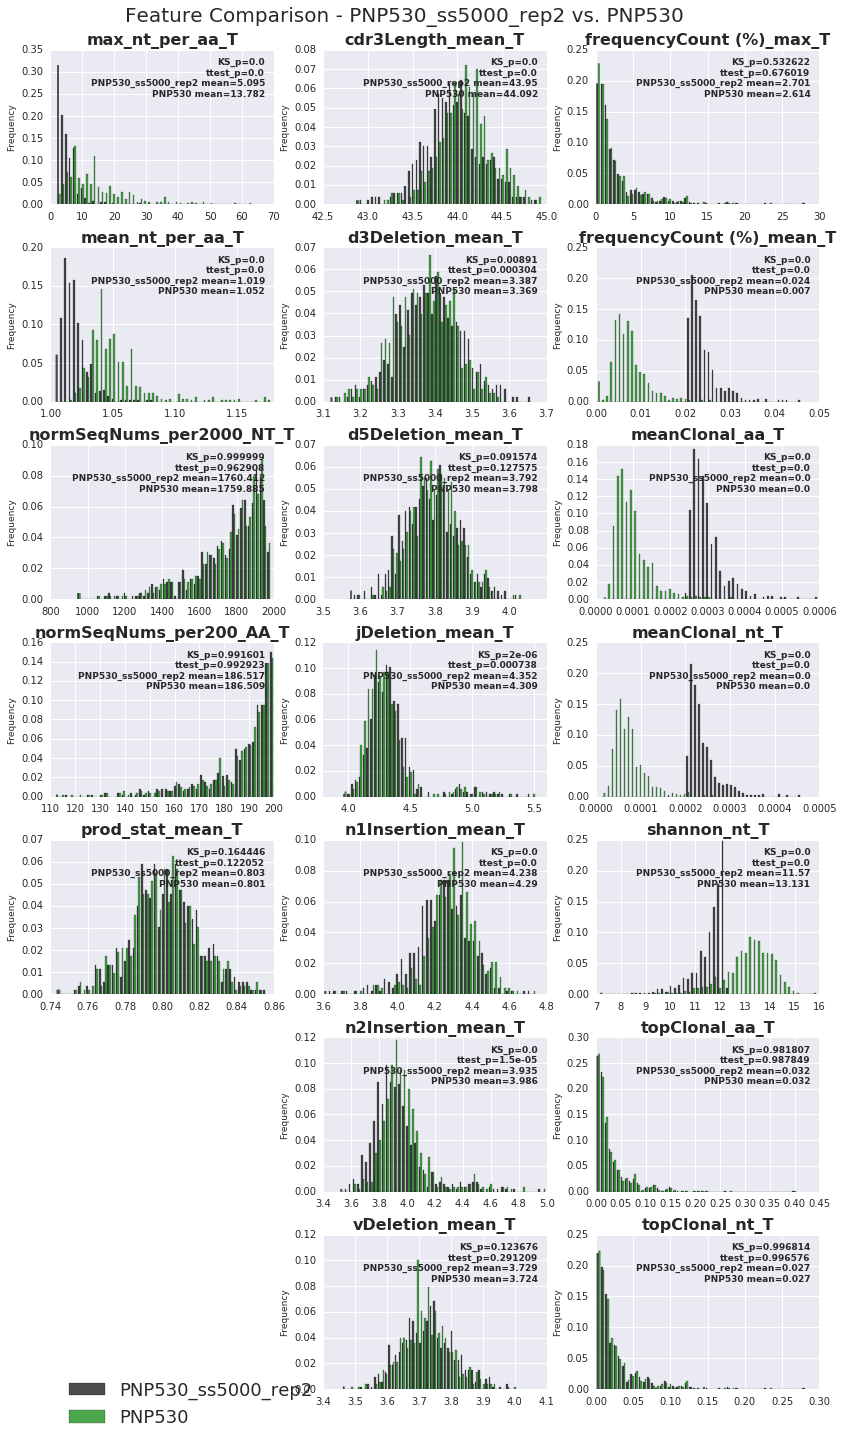

generating excel file with mean values for compared dataset (find in -featureSummaryDFs folder-)


IOError: [Errno 2] No such file or directory: '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/PNP530_SubSampled5000data_rep2/featureSummaryDFs/TCR_real_data_allFeatures'

In [3]:
nTemplates=5000 #always change!
repeat=2 #always change!
datasetName='PNP530' #change if necessary
fullSamplesFolder='%s/TCR_real_data/SamplesForAnalysis_corrected' %MyPath #change if necessary
data_folder_full='TCR_real_data' #change if necessary


subsampling_and_featureExtraction(fullSamplesFolder,nTemplates,repeat,datasetName,data_folder_full,TakeSameSamples = True)

### run for Cardio126 nTemplates=15000, repeat=1

In [ ]:
nTemplates=15000 #always change!
repeat=1 #always change!
datasetName='Cardio126' #change if necessary
fullSamplesFolder='%s/TCR_real_data/CardioSamples/SamplesForAnalysis_corrected' %MyPath #change if necessary
data_folder_full='TCR_real_data/CardioSamples' #change if necessary


subsampling_and_featureExtraction(fullSamplesFolder,nTemplates,repeat,datasetName,data_folder_full,TakeSameSamples = True)

### run for Cardio126 nTemplates=9000, repeat=1

In [ ]:
nTemplates=9000 #always change!
repeat=1 #always change!
datasetName='Cardio126' #change if necessary
fullSamplesFolder='%s/TCR_real_data/CardioSamples/SamplesForAnalysis_corrected' %MyPath #change if necessary
data_folder_full='TCR_real_data/CardioSamples' #change if necessary

subsampling_and_featureExtraction(fullSamplesFolder,nTemplates,repeat,datasetName,data_folder_full,TakeSameSamples = True)

### run for Cardio126 nTemplates=5000, repeat=2

step 1: subsampling (long)
number of samples in folder is 126
0 BD1014
nTemplates in sample is 3819 and therefore this sample is not subsampled
1 BD1068
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 5102
nTemplates in sample is 11906
l list length is 11906 and should be equal to nTemplates
cumsum list length is 5102 and should be equal to n Unique
length of popped nucleotide dataframe is 11906 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
2 BD1013
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 7675
nTemplates in sample is 13691
l list length is 13691 and should be equal to nTemplates
cumsum list length is 7675 and should be equal to n Unique
length of popped nucleotide dataframe is 13691 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates

cumsum list length is 7996 and should be equal to n Unique
length of popped nucleotide dataframe is 19245 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
20 BD980
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 7632
nTemplates in sample is 12664
l list length is 12664 and should be equal to nTemplates
cumsum list length is 7632 and should be equal to n Unique
length of popped nucleotide dataframe is 12664 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
21 BD951
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 4980
nTemplates in sample is 6955
l list length is 6955 and should be equal to nTemplates
cumsum list length is 4980 and should be equal to n Unique
length of popped nucleotide

39 BD1052
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 19434
nTemplates in sample is 26827
l list length is 26827 and should be equal to nTemplates
cumsum list length is 19434 and should be equal to n Unique
length of popped nucleotide dataframe is 26827 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
40 BD1083
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 26781
nTemplates in sample is 38250
l list length is 38250 and should be equal to nTemplates
cumsum list length is 26781 and should be equal to n Unique
length of popped nucleotide dataframe is 38250 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
41 BD973
generating a popped nucleotide sequenes:...
n Unique sequences in sam

57 BD957
nTemplates in sample is 4074 and therefore this sample is not subsampled
58 BD1095
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 7528
nTemplates in sample is 10923
l list length is 10923 and should be equal to nTemplates
cumsum list length is 7528 and should be equal to n Unique
length of popped nucleotide dataframe is 10923 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
59 BD981
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 6535
nTemplates in sample is 15077
l list length is 15077 and should be equal to nTemplates
cumsum list length is 6535 and should be equal to n Unique
length of popped nucleotide dataframe is 15077 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
6

78 BD1049
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 7342
nTemplates in sample is 13571
l list length is 13571 and should be equal to nTemplates
cumsum list length is 7342 and should be equal to n Unique
length of popped nucleotide dataframe is 13571 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
79 BD1035
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 10382
nTemplates in sample is 12152
l list length is 12152 and should be equal to nTemplates
cumsum list length is 10382 and should be equal to n Unique
length of popped nucleotide dataframe is 12152 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
80 BD1058
generating a popped nucleotide sequenes:...
n Unique sequences in samp

96 BD1034
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 4597
nTemplates in sample is 5470
l list length is 5470 and should be equal to nTemplates
cumsum list length is 4597 and should be equal to n Unique
length of popped nucleotide dataframe is 5470 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
97 BD1033
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 9011
nTemplates in sample is 11014
l list length is 11014 and should be equal to nTemplates
cumsum list length is 9011 and should be equal to n Unique
length of popped nucleotide dataframe is 11014 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
98 BD1090
generating a popped nucleotide sequenes:...
n Unique sequences in sample is

generating a popped nucleotide sequenes:...
n Unique sequences in sample is 8941
nTemplates in sample is 11494
l list length is 11494 and should be equal to nTemplates
cumsum list length is 8941 and should be equal to n Unique
length of popped nucleotide dataframe is 11494 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
116 BD971
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 12658
nTemplates in sample is 16408
l list length is 16408 and should be equal to nTemplates
cumsum list length is 12658 and should be equal to n Unique
length of popped nucleotide dataframe is 16408 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
117 BD1065
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 943

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
2 BD964_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage 

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
7 BD1093_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
12 BD995_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage

calculating dep gene usage for dep param D-J gene combination
17 BD963_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
22 BD1062_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usag

calculating dep gene usage for dep param D-J gene combination
27 BD1033_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage feature

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
32 BD983_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
37 BD952_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
42 BD962_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
47 BD1017_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usag

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
52 BD1008_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usag

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
57 BD1089_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usag

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
62 BD1096_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usag

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
67 BD980_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
72 BD976_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage

calculating dep gene usage for dep param D-J gene combination
77 BD1068_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage feature

calculating dep gene usage for dep param D-J gene combination
82 BD1030_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage feature

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
87 BD1036_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usag

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
92 BD999_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage

calculating dep gene usage for dep param D-J gene combination
97 BD1051_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage feature

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
102 BD1006_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usa

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
107 BD1066_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usa

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
112 BD981_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usag

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
117 BD1011_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usa

96
V12-01_0
109
V12-05_0
117
V13-01_0
113
V16-01_0
32
V17-01_0
4
V20-01_0
79
V22-01_0
9
V23-or09_02_0
1
V26-01_0
6
V28-01_0
118
V30-01_0
118
VA-or09_02_0
12
normSeqNums_per2000_NT_0
0
normSeqNums_per200_AA_0
2
comparing features between ss and original datasets... (short)
generating excel file with mean values for compared dataset (find in -featureSummaryDFs folder-)
taking only samples common to the two cohorts:
number of samples in cohort 1 is 119
number of samples in cohort 2 is 126
number of common samples is 119
 cohort1 df length is now 119
 cohort2 df length is now 119
comparing datasets and plot selected features:...
plot file can be found in -realAnalysis folder


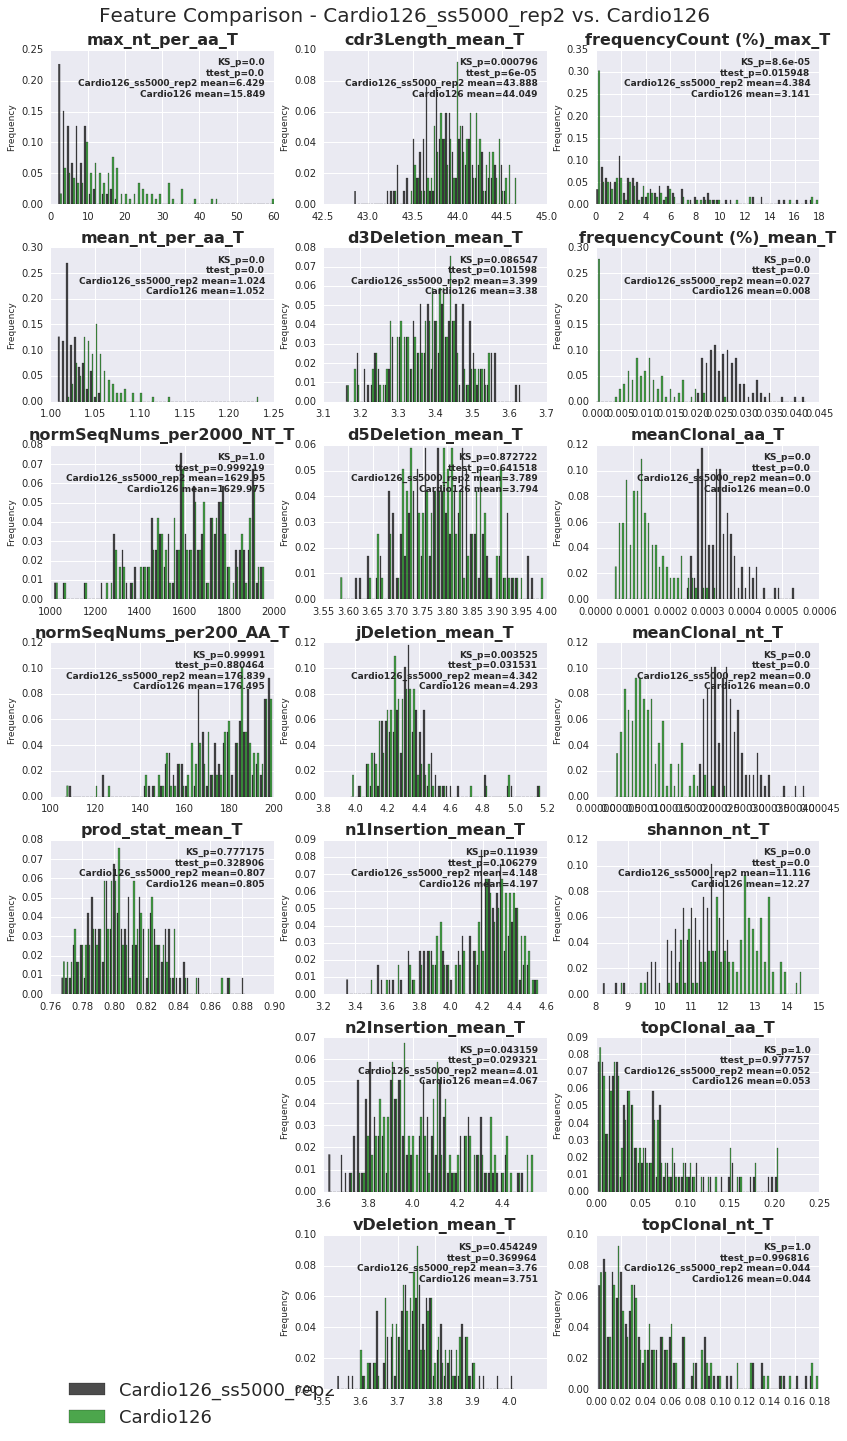

generating excel file with mean values for compared dataset (find in -featureSummaryDFs folder-)


IOError: [Errno 2] No such file or directory: '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/Cardio126_SubSampled5000data_rep2/featureSummaryDFs/TCR_real_data/CardioSamples_allFeatures'

In [5]:
nTemplates=5000 #always change!
repeat=2 #always change!
datasetName='Cardio126' #change if necessary
fullSamplesFolder='%s/TCR_real_data/CardioSamples/SamplesForAnalysis_corrected' %MyPath #change if necessary
data_folder_full='TCR_real_data/CardioSamples' #change if necessary

subsampling_and_featureExtraction(fullSamplesFolder,nTemplates,repeat,datasetName,data_folder_full,TakeSameSamples = True)

### run for Cardio126 nTemplates=5000, repeat=1

step 1: subsampling (long)
number of samples in folder is 126
0 BD1014
nTemplates in sample is 3819 and therefore this sample is not subsampled
1 BD1068
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 5102
nTemplates in sample is 11906
l list length is 11906 and should be equal to nTemplates
cumsum list length is 5102 and should be equal to n Unique
length of popped nucleotide dataframe is 11906 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
2 BD1013
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 7675
nTemplates in sample is 13691
l list length is 13691 and should be equal to nTemplates
cumsum list length is 7675 and should be equal to n Unique
length of popped nucleotide dataframe is 13691 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates

generating a popped nucleotide sequenes:...
n Unique sequences in sample is 7632
nTemplates in sample is 12664
l list length is 12664 and should be equal to nTemplates
cumsum list length is 7632 and should be equal to n Unique
length of popped nucleotide dataframe is 12664 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
21 BD951
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 4980
nTemplates in sample is 6955
l list length is 6955 and should be equal to nTemplates
cumsum list length is 4980 and should be equal to n Unique
length of popped nucleotide dataframe is 6955 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
22 BD1093
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 13678
nTem

generating a popped nucleotide sequenes:...
n Unique sequences in sample is 19434
nTemplates in sample is 26827
l list length is 26827 and should be equal to nTemplates
cumsum list length is 19434 and should be equal to n Unique
length of popped nucleotide dataframe is 26827 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
40 BD1083
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 26781
nTemplates in sample is 38250
l list length is 38250 and should be equal to nTemplates
cumsum list length is 26781 and should be equal to n Unique
length of popped nucleotide dataframe is 38250 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
41 BD973
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 886

generating a popped nucleotide sequenes:...
n Unique sequences in sample is 7528
nTemplates in sample is 10923
l list length is 10923 and should be equal to nTemplates
cumsum list length is 7528 and should be equal to n Unique
length of popped nucleotide dataframe is 10923 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
59 BD981
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 6535
nTemplates in sample is 15077
l list length is 15077 and should be equal to nTemplates
cumsum list length is 6535 and should be equal to n Unique
length of popped nucleotide dataframe is 15077 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
60 BD950
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 9024
nTe

length of popped nucleotide dataframe is 16825 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
78 BD1049
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 7342
nTemplates in sample is 13571
l list length is 13571 and should be equal to nTemplates
cumsum list length is 7342 and should be equal to n Unique
length of popped nucleotide dataframe is 13571 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
79 BD1035
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 10382
nTemplates in sample is 12152
l list length is 12152 and should be equal to nTemplates
cumsum list length is 10382 and should be equal to n Unique
length of popped nucleotide dataframe is 12152 and should be equal to nTemplates

96 BD1034
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 4597
nTemplates in sample is 5470
l list length is 5470 and should be equal to nTemplates
cumsum list length is 4597 and should be equal to n Unique
length of popped nucleotide dataframe is 5470 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
97 BD1033
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 9011
nTemplates in sample is 11014
l list length is 11014 and should be equal to nTemplates
cumsum list length is 9011 and should be equal to n Unique
length of popped nucleotide dataframe is 11014 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
98 BD1090
generating a popped nucleotide sequenes:...
n Unique sequences in sample is

115 BD1019
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 8941
nTemplates in sample is 11494
l list length is 11494 and should be equal to nTemplates
cumsum list length is 8941 and should be equal to n Unique
length of popped nucleotide dataframe is 11494 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
116 BD971
generating a popped nucleotide sequenes:...
n Unique sequences in sample is 12658
nTemplates in sample is 16408
l list length is 16408 and should be equal to nTemplates
cumsum list length is 12658 and should be equal to n Unique
length of popped nucleotide dataframe is 16408 and should be equal to nTemplates
subsampling...
subsampled df length is 5000 and should be equal to 5000
templates sum in subsampled file is 5000 and should be equal to 5000
117 BD1065
generating a popped nucleotide sequenes:...
n Unique sequences in sa

calculating dep gene usage for dep param D-J gene combination
2 BD1017_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features

Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for pa

Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for pa

17 BD1096_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating ge

Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for pa

Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for pa

Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for pa

37 BD1030_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating ge

42 BD1098_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating ge

47 BD967_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gen

52 BD977_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gen

calculating dep gene usage for dep param D-J gene combination
57 BD1076_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage feature

62 BD1066_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating ge

67 BD996_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gen

72 BD989_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gen

calculating dep gene usage for dep param D-J gene combination
77 BD1012_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage feature

calculating dep gene usage for dep param D-J gene combination
82 BD1075_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage feature

87 BD964_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gen

92 BD974_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage features...
calculating gene usage for param vGeneName
calculating gen

calculating dep gene usage for dep param D-J gene combination
97 BD1094_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage feature

calculating dep gene usage for dep param D-J gene combination
102 BD1033_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage featur

calculating dep gene usage for dep param D-J gene combination
107 BD1013_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage featur

calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
112 BD1073_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usa

calculating dep gene usage for dep param D-J gene combination
117 BD993_5000
Total
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
Prod
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
nonProd
calculating length features...
calculating general features...
calculating normSeqNums features...
calculating clonality features...
calculating diversity features...
counting gene usage features...
calculating gene usage for param vGeneName
calculating gene usage for param vFamilyName
calculating gene usage for param dFamilyName
calculating gene usage for param jGeneName
counting dependent gene usage features...
calculating dep gene usage for dep param V-J family combination
calculating dep gene usage for dep param D-J gene combination
counting gene usage feature

76
V21_J01_0
118
V22_J01_0
2
V22_J02_0
5
V23_J01_0
110
V25_J01_0
102
V25_J02_0
118
V26_J01_0
1
V26_J02_0
5
V27_J01_0
118
V28_J01_0
111
V28_J02_0
117
V29_J01_0
112
V30_J01_0
111
VA_J01_0
2
VA_J02_0
10
D01_J01-05_0
55
D01_J01-06_0
113
D01_J02-04_0
116
D01_J02-06_0
116
D02_J01-05_0
33
D02_J01-06_0
106
D02_J02-06_0
115
comparing features between ss and original datasets... (short)
generating excel file with mean values for compared dataset (find in -featureSummaryDFs folder-)
taking only samples common to the two cohorts:
number of samples in cohort 1 is 119
number of samples in cohort 2 is 126
number of common samples is 119
 cohort1 df length is now 119
 cohort2 df length is now 119
comparing datasets and plot selected features:...
plot file can be found in -realAnalysis folder


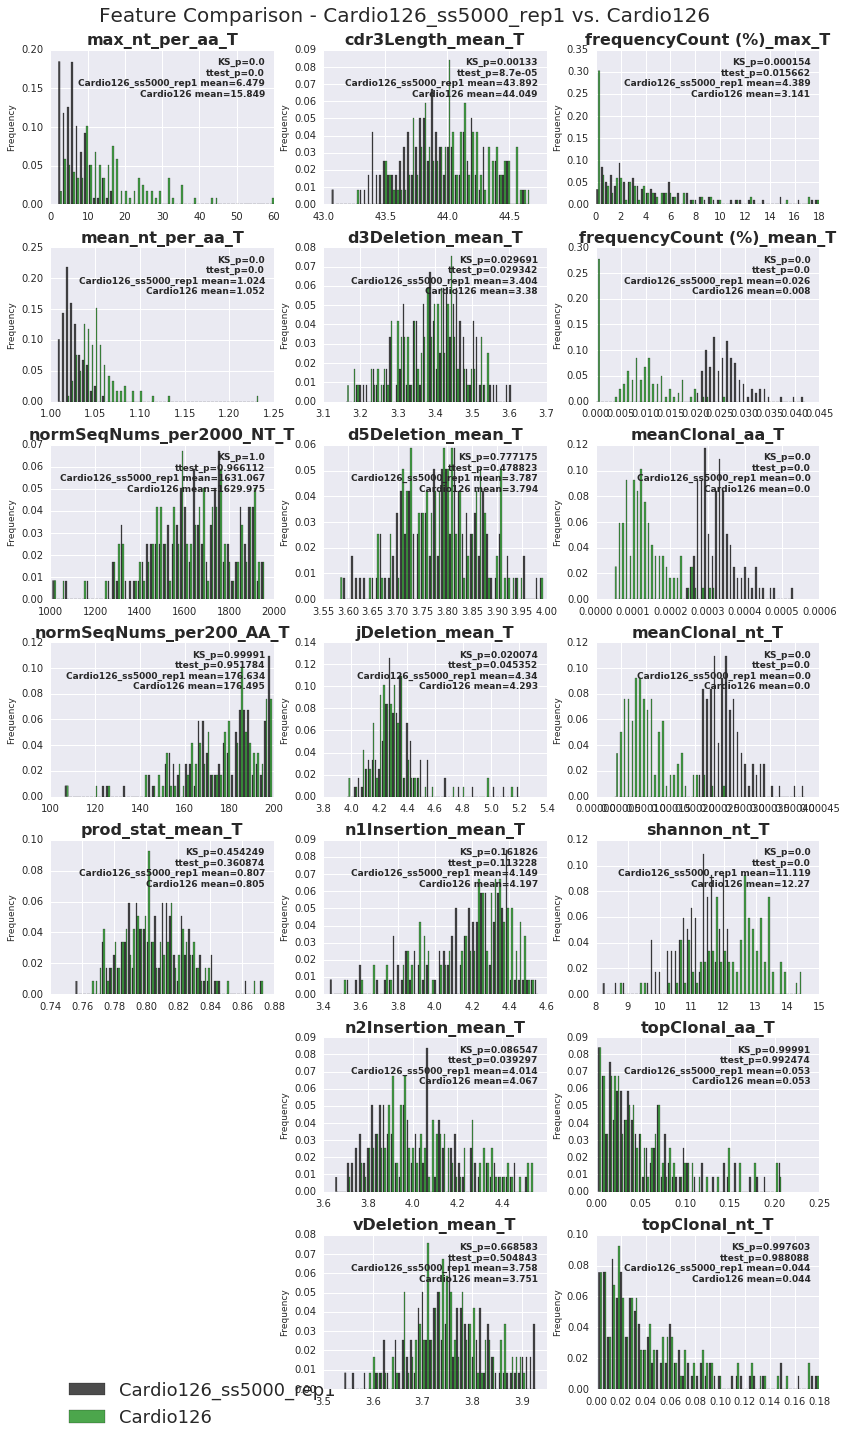

generating excel file with mean values for compared dataset (find in -featureSummaryDFs folder-)


IOError: [Errno 2] No such file or directory: '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/Cardio126_SubSampled5000data_rep1/featureSummaryDFs/TCR_real_data/CardioSamples_allFeatures'

In [4]:
nTemplates=5000 #always change!
repeat=1 #always change!
datasetName='Cardio126' #change if necessary
fullSamplesFolder='%s/TCR_real_data/CardioSamples/SamplesForAnalysis_corrected' %MyPath #change if necessary
data_folder_full='TCR_real_data/CardioSamples' #change if necessary

subsampling_and_featureExtraction(fullSamplesFolder,nTemplates,repeat,datasetName,data_folder_full,TakeSameSamples = True)

### run for Ravid4 nTemplates=5000, repeat=1

In [ ]:
nTemplates=5000 #always change!
repeat=1 #always change!
datasetName='RavidSamples' #change if necessary
fullSamplesFolder='%s/TCR_real_data/RavidSamples/SamplesForAnalysis_corrected' %MyPath #change if necessary
data_folder_full='TCR_real_data/RavidSamples' #change if necessary


subsampling_and_featureExtraction(fullSamplesFolder,nTemplates,repeat,datasetName,data_folder_full,TakeSameSamples = True)